<a href="https://colab.research.google.com/github/Han-Wanburhan/ImageProcessing/blob/main/ImageProcessing_KMITL_Lab02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==================================LAB02==============================
#                                  [FiLab02](https://drive.google.com/file/d/1C4QzFfDAf-gU_KlN_1dvLpwABpglAeJ3/view?usp=sharing)

In [2]:
from google.colab import output
output.enable_custom_widget_manager()
!pip install ipympl -q
!pip install mediapy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00


# ==============================LAB2.1.1_V1==============================

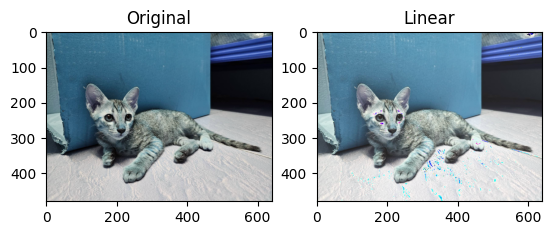

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapy as media
from tqdm import trange
img_1 = cv2.imread("./img/Miso.jpg")
image_resized = cv2.resize(img_1, (640, 480))

output_file = "./video/lab_2.1.1_V1_output_file.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

fps = 1
frame = 1

vid_output = cv2.VideoWriter(output_file,fourcc, fps, (640,480))
# img_gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
# img_gray1 = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
def LinearEquation(img):
    A = [0.5,1]
    B = [3,6,9,12,15,18,21,24,27,30]
    H,W,C = img.shape
    # H,W = img.shape
    result_img = np.zeros_like(img)
    for a in A:
        for b in B:
            for w in range(0,W):
                for h in range(0,H):
                    for c in range(0,C):
                        result_img[h,w,c] = a*(img[h][w][c])+b
                #    result_img[h,w] = a*(img[h][w])+b
            vid_output.write(result_img)
    return result_img


test = LinearEquation(image_resized)

plt.subplot(1, 2, 1)
plt.imshow(image_resized,cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(test,cmap='gray')
plt.title("Linear")



plt.show()
vid_output.release()
video2 = media.read_video("./video/lab_2.1.1_V1_output_file.mp4")
media.show_video(video2, fps=1)



# ==============================LAB2.1.1_V2==============================

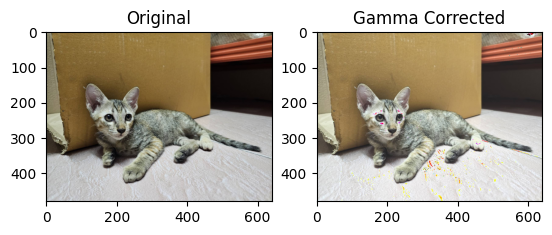

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media
from tqdm import trange

def GammaEquation(img, A , B):
    result_img = A * (img) + B
    result_img[result_img < 0] = 0
    result_img[result_img > 255] = 255
    return result_img.astype(np.uint8)

img_1 = cv2.imread("./img/Miso.jpg")
image_resized = cv2.resize(img_1, (640, 480))

output_file = "./video/lab_2.1.1_V2_output_file.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 1

vid_output = cv2.VideoWriter(output_file, fourcc, fps, (640, 480))

A = [0.5,1]
B = [3,6,9,12,15,18,21,24,27,30]

for a in A:
    for b in B:
        adjusted_img = GammaEquation(image_resized, a, b)
        vid_output.write(adjusted_img)

vid_output.release()

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
plt.title("Gamma Corrected")

plt.show()
video2 = media.read_video("./video/lab_2.1.1_V2_output_file.mp4")
media.show_video(video2, fps=1)

# ==============================LAB2.1.2_V1==============================

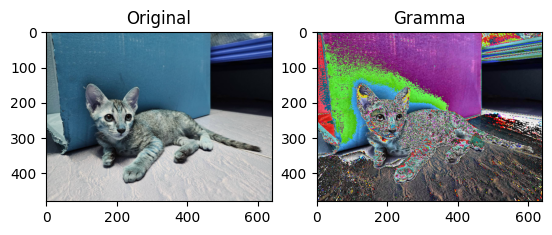

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapy as media
from tqdm import trange

img_1 = cv2.imread("./img/Miso.jpg")
image_resized = cv2.resize(img_1, (640, 480))

output_file = "./video/lab_2.1.2_V1_output_file.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

fps = 1
frame = 1

vid_output = cv2.VideoWriter(output_file,fourcc, fps, (640, 480))
def GammaEquation(img):
    A = 1
    B = 0
    Y = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20]
    H,W,C = img.shape
    result_img = np.zeros_like(img)
    for y in Y:
        for w in range(0,W):
            for h in range(0,H):
                for c in range(0,C):
                    result_img[h,w,c] = A*(img[h][w][c])**y+B
        vid_output.write(result_img)
    return result_img


test = GammaEquation(image_resized)

plt.subplot(1, 2, 1)
plt.imshow(image_resized,cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(test,cmap='gray')
plt.title("Gramma")



plt.show()
vid_output.release()

video2 = media.read_video("./video/lab_2.1.2_V1_output_file.mp4")
media.show_video(video2, fps=1)


# ==============================LAB2.1.2_V2==============================

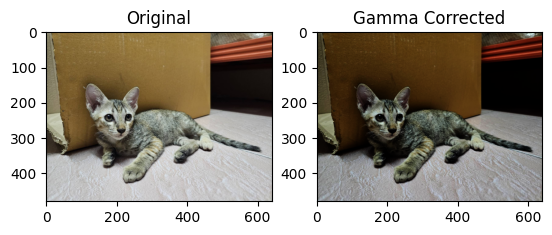

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media
from tqdm import trange


def GammaEquation(img, gamma):
    A = 1
    B = 0
    result_img = A * (img ** gamma) + B
    result_img = Quantize(result_img)
    return result_img.astype(np.uint8)

def Quantize (img):
    img = (img-np.min(img))/(np.max(img)-np.min(img))
    img = img*(2**8-1)
    return img

img_1 = cv2.imread("./img/Miso.jpg")
img_1 = cv2.resize(img_1, (640, 480))

output_file = "./video/lab_2.1.2_V2_output_file.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 1

vid_output = cv2.VideoWriter(output_file, fourcc, fps, (640, 480))

Y_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.99]

for gamma in Y_values:
    adjusted_img = GammaEquation(img_1, gamma)
    vid_output.write(adjusted_img)

vid_output.release()

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
plt.title("Gamma Corrected")

plt.show()

video2 = media.read_video("./video/lab_2.1.2_V2_output_file.mp4")
media.show_video(video2, fps=1)

# =================================LAB2.2=================================

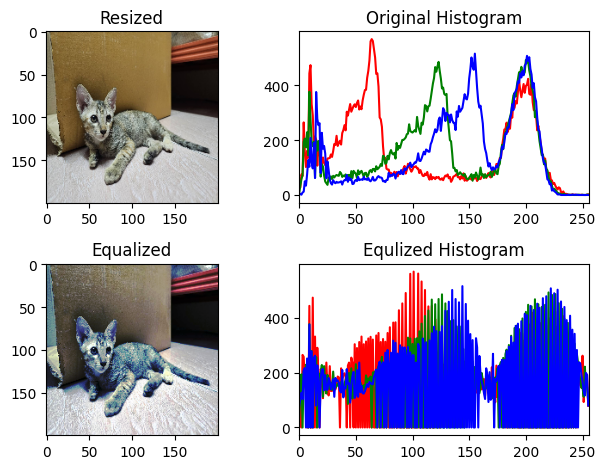

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_1 = cv2.imread("./img/Miso.jpg")
image_resized = cv2.resize(img_1, (200, 200))

# Split the resized image into its color channels
b, g, r = cv2.split(image_resized)

# Apply histogram equalization to each color channel
equa_b = cv2.equalizeHist(b)
equa_g = cv2.equalizeHist(g)
equa_r = cv2.equalizeHist(r)

# Merge the equalized color channels back into an image
equa_colored = cv2.merge((equa_b, equa_g, equa_r))


plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Resized")

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(equa_colored, cv2.COLOR_BGR2RGB))
plt.title("Equalized")

plt.subplot(2, 2, 2)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_resized], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title("Original Histogram")

plt.subplot(2, 2, 4)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([equa_colored], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title("Equlized Histogram")


plt.tight_layout()
plt.show()

# =================================LAB2.3=================================

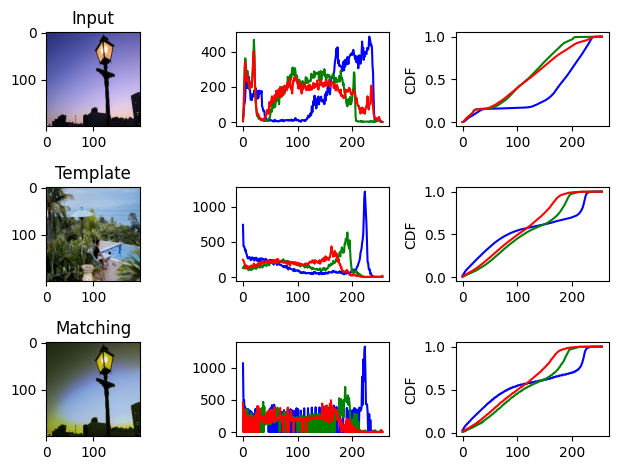

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread                         # load the image
from skimage.exposure import cumulative_distribution  # calculate the cumulative pixel value
import numpy as np                                    # reshape the image
import matplotlib.pyplot as plt                       # plot the result

img_1 = cv2.imread("./img/Temp1.jpg")
image1_resized = cv2.resize(img_1, (200, 200))
img_2 = cv2.imread("./img/Temp2.jpg")
image2_resized = cv2.resize(img_2, (200, 200))

im1b, im1g, im1r = cv2.split(image1_resized)
im2b, im2g, im2r = cv2.split(image2_resized)

pixels = np.arange(256)

def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image1_resized, cv2.COLOR_BGR2RGB))
plt.title("Input")
ax1 = plt.subplot(3, 3, 2)
ax2 = plt.subplot(3, 3, 3)
for i, c in enumerate('bgr'):
    hist = cv2.calcHist([image1_resized], [i], None, [256], [0, 256])
    cdf1 = np.cumsum(hist) / sum(hist)  # Calculate CDF
    # print (np.cumsum(hist),"/",sum(hist),"=",cdf1)
    ax1.plot(hist, c)  # Histogram
    ax2.plot(cdf1, c)  # Cumulative Distribution Function
    ax2.set_ylabel("CDF")

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(image2_resized, cv2.COLOR_BGR2RGB))
plt.title("Template")
ax3 = plt.subplot(3, 3, 5)
ax4 = plt.subplot(3, 3, 6)
for i, c in enumerate('bgr'):
    hist = cv2.calcHist([image2_resized], [i], None, [256], [0, 256])
    cdf2 = np.cumsum(hist) / sum(hist)  # Calculate CDF
    # print (np.cumsum(hist),"/",sum(hist),"=",cdf2)
    ax3.plot(hist, c)  # Histogram
    ax4.plot(cdf2, c)  # Cumulative Distribution Function
    ax4.set_ylabel("CDF")

image_result = np.zeros((image1_resized.shape)).astype(np.uint8)

for i in range(3):
    cdfInput = getCDF(image1_resized[:,:,i])
    cdfTemplate = getCDF(image2_resized[:,:,i])
    image_result[:,:,i] = histMatch(cdfInput, cdfTemplate, image1_resized[:,:,i])


plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
plt.title("Matching")
ax5 = plt.subplot(3, 3, 8)
ax6 = plt.subplot(3, 3, 9)
for i, c in enumerate('bgr'):
    hist = cv2.calcHist([image_result], [i], None, [256], [0, 256])
    cdf2 = np.cumsum(hist) / sum(hist)  # Calculate CDF
    # print (np.cumsum(hist),"/",sum(hist),"=",cdf2)
    ax5.plot(hist, c)  # Histogram
    ax6.plot(cdf2, c)  # Cumulative Distribution Function
    ax6.set_ylabel("CDF")

cv2.imwrite('./img/output/image_result.jpg', image_result)
plt.tight_layout()
plt.show()
